In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates


In [3]:
from config import DATA_DIR
raw_hazelnut_file = PROJECT_ROOT / DATA_DIR / "raw" / "hazelnut_price.csv"
hazelnut_file = PROJECT_ROOT / DATA_DIR / "processed" / "hazelnut_price.csv"

figures_dir = PROJECT_ROOT / "figures" / "hazelnut_prices"
os.makedirs(figures_dir, exist_ok=True)

In [4]:
df = pd.read_csv(raw_hazelnut_file, parse_dates=["Date"])
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df.describe()

,Date,Value
count,9861,3.777000e+03
mean,2012-07-01 02:23:59.123821056,4.713974e+05
min,1999-01-01 00:00:00,2.300000e+00
25%,2005-10-01 00:00:00,5.000000e+00
50%,2012-07-01 00:00:00,1.500000e+01
75%,2019-04-01 00:00:00,7.127090e+05
max,2025-12-31 00:00:00,4.999190e+06
std,NaN,9.461492e+05


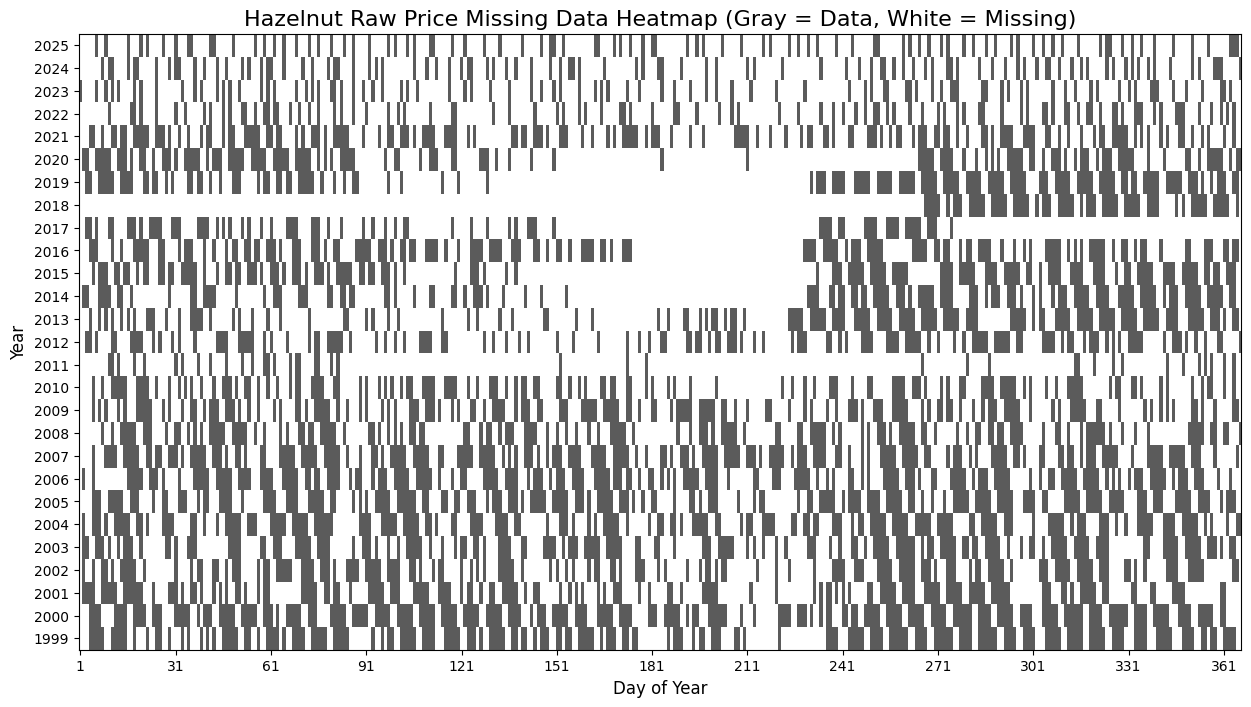

In [5]:
df['is_missing'] = df['Value'].isna().astype(int)

df['day_of_year'] = df['Date'].dt.dayofyear
df['year'] = df['Date'].dt.year

heatmap_data = df.pivot_table(
    values='is_missing',
    index='year',
    columns='day_of_year',
    aggfunc='first'
)

heatmap_data = heatmap_data.fillna(1).astype(int)
cmap = ListedColormap(['#5b5b5b', 'white'])

plt.figure(figsize=(15, 8))
plt.imshow(
    heatmap_data,
    cmap=cmap,
    aspect='auto',
    interpolation='none',
    origin='lower'
)

plt.title('Hazelnut Raw Price Missing Data Heatmap (Gray = Data, White = Missing)', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.xticks(
    ticks=np.arange(0, 365, 30),
    labels=[str(i+1) for i in range(0, 365, 30)]
)

plt.yticks(
    ticks=np.arange(len(heatmap_data.index)),
    labels=heatmap_data.index
)

plt.savefig(figures_dir / "raw-hazelnut-missing-heatmap.png")
plt.show()


C:\Users\Yusuf Efdal Yılmaz\AppData\Local\Temp\ipykernel_22280\2815241159.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: len(x))


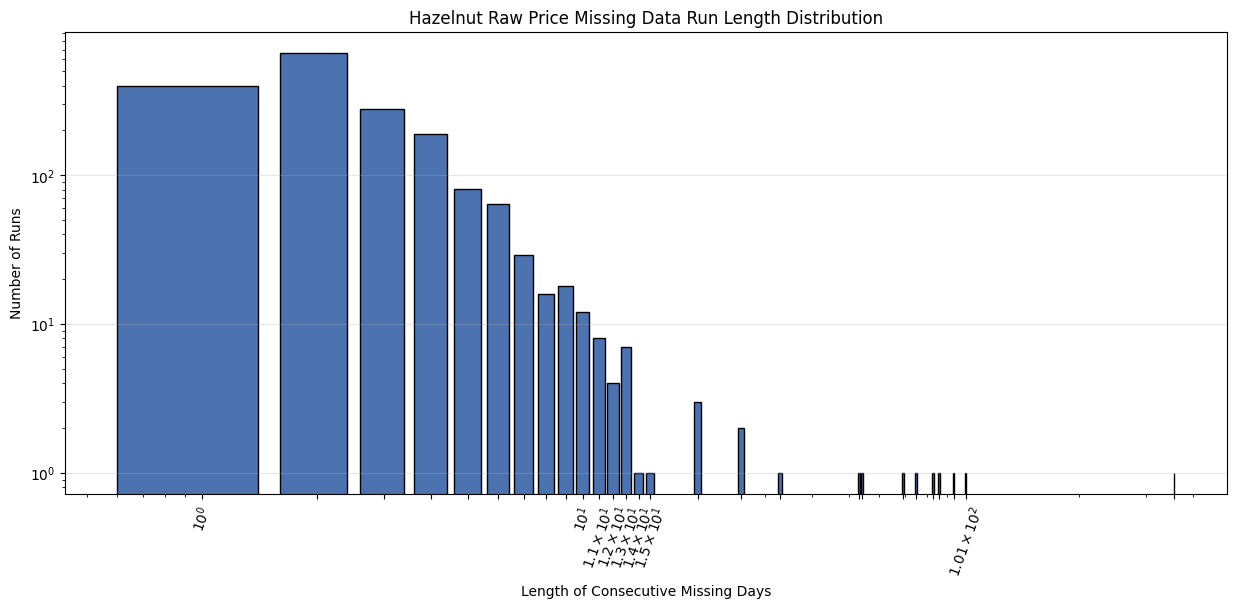

In [ ]:
df = pd.read_csv(raw_hazelnut_file, parse_dates=["Date"])

df = df.sort_values("Date")

df["is_miss"] = df["Value"].isna()

df['missing_group'] = (df['is_miss'] != df['is_miss'].shift()).cumsum()

missing_segments = (
    df[df["is_miss"]]
      .groupby('missing_group')
      .apply(lambda x: len(x))
      .reset_index(name='run_length')
)

counts = missing_segments["run_length"].value_counts().sort_index()

plt.figure(figsize=(15,6))
plt.bar(counts.index, counts.values, edgecolor="k", color="#4C72B0")
plt.title("Hazelnut Raw Price Missing Data Run Length Distribution")
plt.xlabel("Length of Consecutive Missing Days")
plt.ylabel("Number of Runs")
plt.yscale("log")
plt.xscale("log")
plt.xticks(counts.index, rotation=70)
plt.grid(axis="y", alpha=0.3)

plt.savefig(figures_dir / "raw-hazelnut-missing-hist.png")
plt.show()

In [10]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df.describe()

,Date,Value,iValue,rolling_14d,AdjustedValue,iAdjusted,rolling_14d_adjusted,USD_TL
count,9862,3777.000000,8955.000000,9128.000000,3777.000000,8955.000000,9128.000000,9862.000000
mean,2012-07-01 12:00:00,16.579554,22.927100,22.525604,2.727991,2.786247,2.784686,6.343277
min,1999-01-01 00:00:00,0.536056,0.536056,0.587859,0.690343,0.690343,0.730755,0.315220
25%,2005-10-01 06:00:00,2.420000,2.907000,2.943941,1.797479,1.955942,1.946889,1.414143
50%,2012-07-01 12:00:00,4.620000,5.110000,5.321429,2.665042,2.721972,2.721873,1.798403
75%,2019-04-01 18:00:00,12.750000,16.653333,16.586964,3.248190,3.301866,3.304607,5.698383
max,2025-12-31 00:00:00,328.310000,328.310000,323.232619,7.895560,7.895560,7.769791,42.939500
std,NaN,37.820052,46.624648,45.760564,1.228727,1.214680,1.205156,9.955254


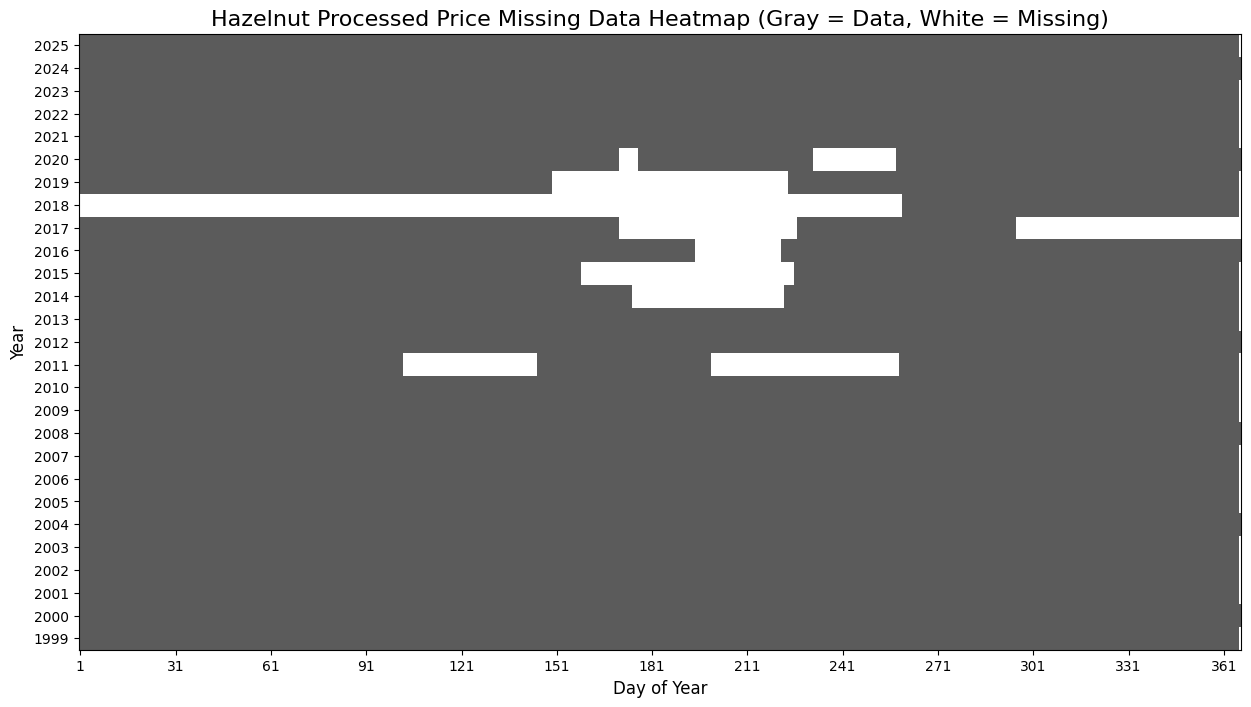

In [12]:
df['is_missing'] = df['rolling_14d'].isna().astype(int)

df['day_of_year'] = df['Date'].dt.dayofyear
df['year'] = df['Date'].dt.year

heatmap_data = df.pivot_table(
    values='is_missing',
    index='year',
    columns='day_of_year',
    aggfunc='first'
)
heatmap_data = heatmap_data.fillna(1).astype(int)
cmap = ListedColormap(['#5b5b5b', 'white'])

plt.figure(figsize=(15, 8))
plt.imshow(
    heatmap_data,
    cmap=cmap,
    aspect='auto',
    interpolation='none',
    origin='lower'
)

plt.title('Hazelnut Processed Price Missing Data Heatmap (Gray = Data, White = Missing)', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.xticks(
    ticks=np.arange(0, 365, 30),
    labels=[str(i+1) for i in range(0, 365, 30)]
)

plt.yticks(
    ticks=np.arange(len(heatmap_data.index)),
    labels=heatmap_data.index
)

plt.savefig(figures_dir / "processed-hazelnut-missing-heatmap.png")
plt.show()


C:\Users\Yusuf Efdal Yılmaz\AppData\Local\Temp\ipykernel_22280\3302210604.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: len(x))


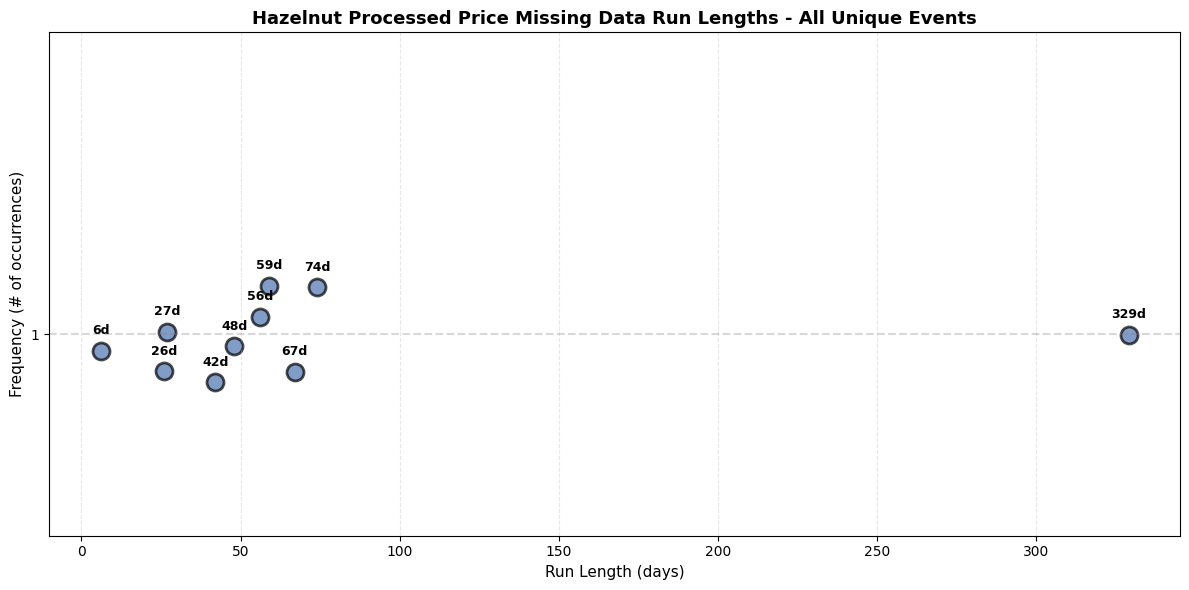

In [15]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])

df = df.sort_values("Date")

df["is_miss"] = df["rolling_14d"].isna()

df['missing_group'] = (df['is_miss'] != df['is_miss'].shift()).cumsum()

missing_segments = (
    df[df["is_miss"]]
      .groupby('missing_group')
      .apply(lambda x: len(x))
      .reset_index(name='run_length')
)

run_counts = missing_segments["run_length"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

np.random.seed(4498)  # For reproducibility
jitter = np.random.uniform(-0.05, 0.05, size=len(run_counts))

plt.scatter(run_counts.index, run_counts.values + jitter, 
           s=150, color="#4C72B0", alpha=0.7, edgecolors='black', linewidth=2)

for i, (length, count) in enumerate(run_counts.items()):
    plt.annotate(f'{length}d', 
                xy=(length, count + jitter[i]), 
                xytext=(0, 12), 
                textcoords='offset points',
                ha='center', 
                fontsize=9,
                fontweight='bold')

plt.xlabel("Run Length (days)", fontsize=11)
plt.ylabel("Frequency (# of occurrences)", fontsize=11)
plt.title("Hazelnut Processed Price Missing Data Run Lengths - All Unique Events", fontsize=13, fontweight='bold')
plt.ylim(0.8, 1.3)
plt.yticks([1])
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig(figures_dir / "processed-hazelnut-missing-scatter.png")
plt.show()

In [14]:
missing_segments["run_length"].value_counts().sort_index()

run_length
6      1
26     1
27     1
42     1
48     1
56     1
59     1
67     1
74     1
329    1
Name: count, dtype: int64

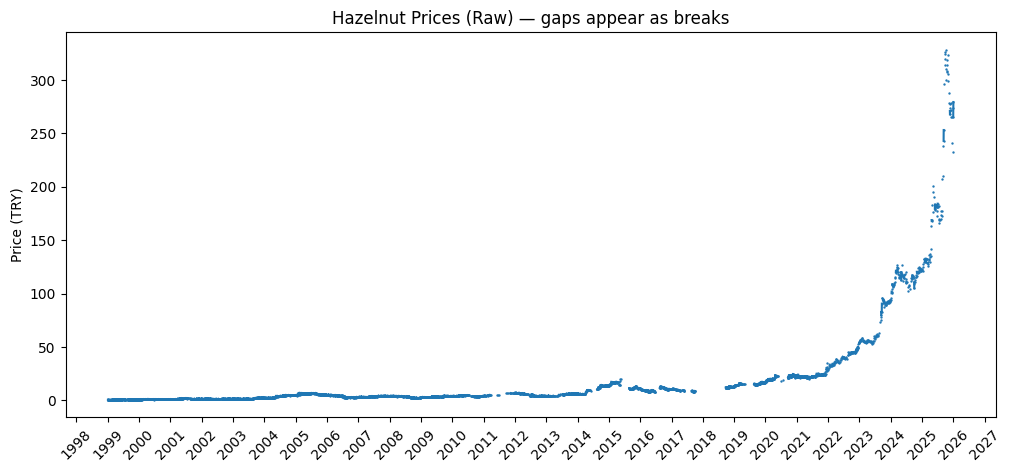

In [17]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Value'], marker='o', linestyle='-', markersize=0.7)
plt.title("Hazelnut Prices (Raw) — gaps appear as breaks")
plt.ylabel("Price (TRY)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.savefig(figures_dir / "raw-hazelnut_prices.png")
plt.show()

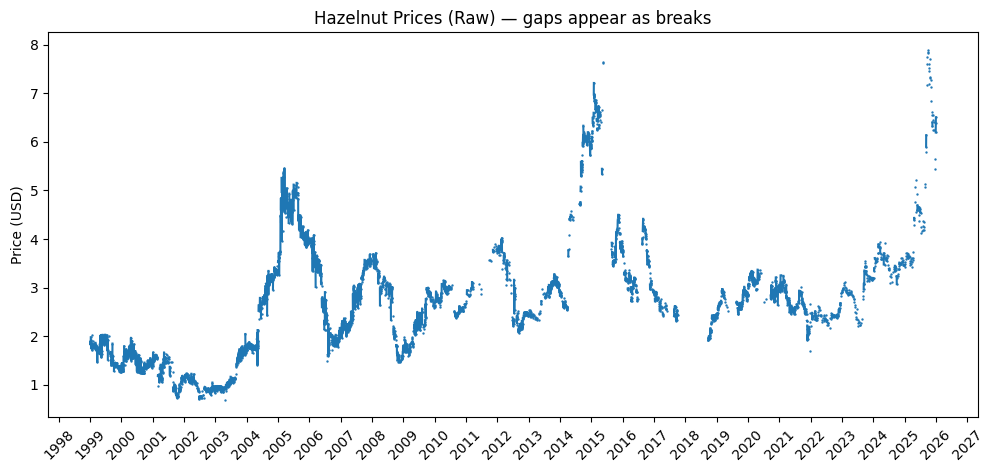

In [18]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

plt.figure(figsize=(12,5))
plt.plot(df.index, df['AdjustedValue'], marker='o', linestyle='-', markersize=0.7)
plt.title("Hazelnut Prices (Raw) — gaps appear as breaks")
plt.ylabel("Price (USD)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.savefig(figures_dir / "raw-adjusted-hazelnut_prices.png")
plt.show()

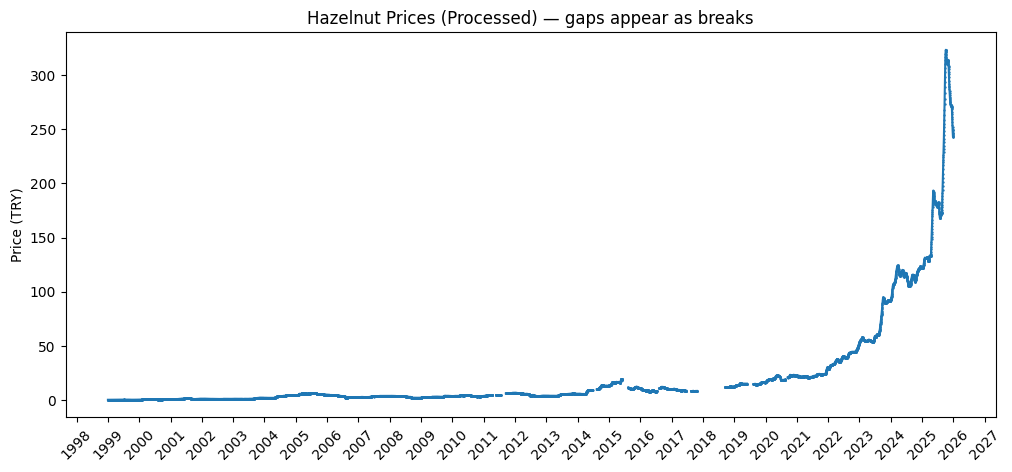

In [20]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

plt.figure(figsize=(12,5))
plt.plot(df.index, df['rolling_14d'], marker='o', linestyle='-', markersize=0.7)
plt.title("Hazelnut Prices (Processed) — gaps appear as breaks")
plt.ylabel("Price (TRY)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.savefig(figures_dir / "processed-hazelnut_prices.png")
plt.show()

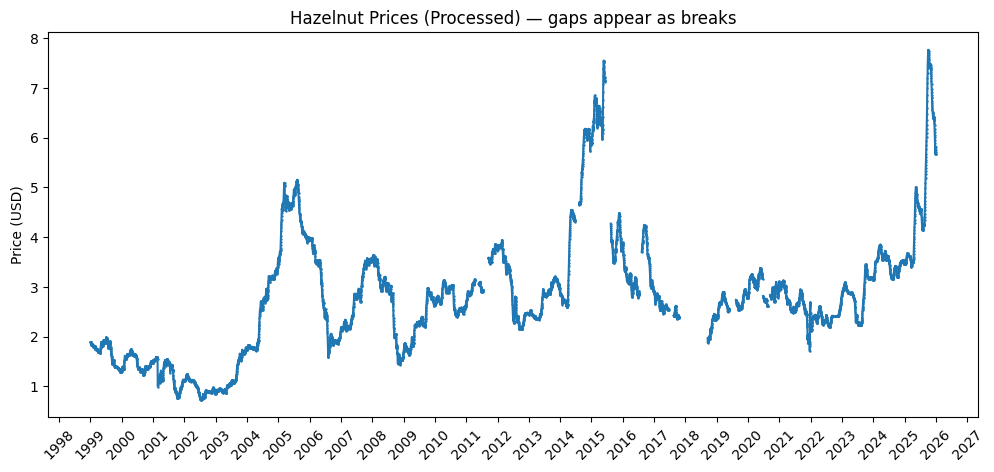

In [21]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])

df = df.set_index("Date").asfreq('D')

plt.figure(figsize=(12,5))
plt.plot(df.index, df['rolling_14d_adjusted'], marker='o', linestyle='-', markersize=0.7)
plt.title("Hazelnut Prices (Processed) — gaps appear as breaks")
plt.ylabel("Price (USD)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)


plt.savefig(figures_dir / "processed-adjusted-hazelnut_prices.png")
plt.show()

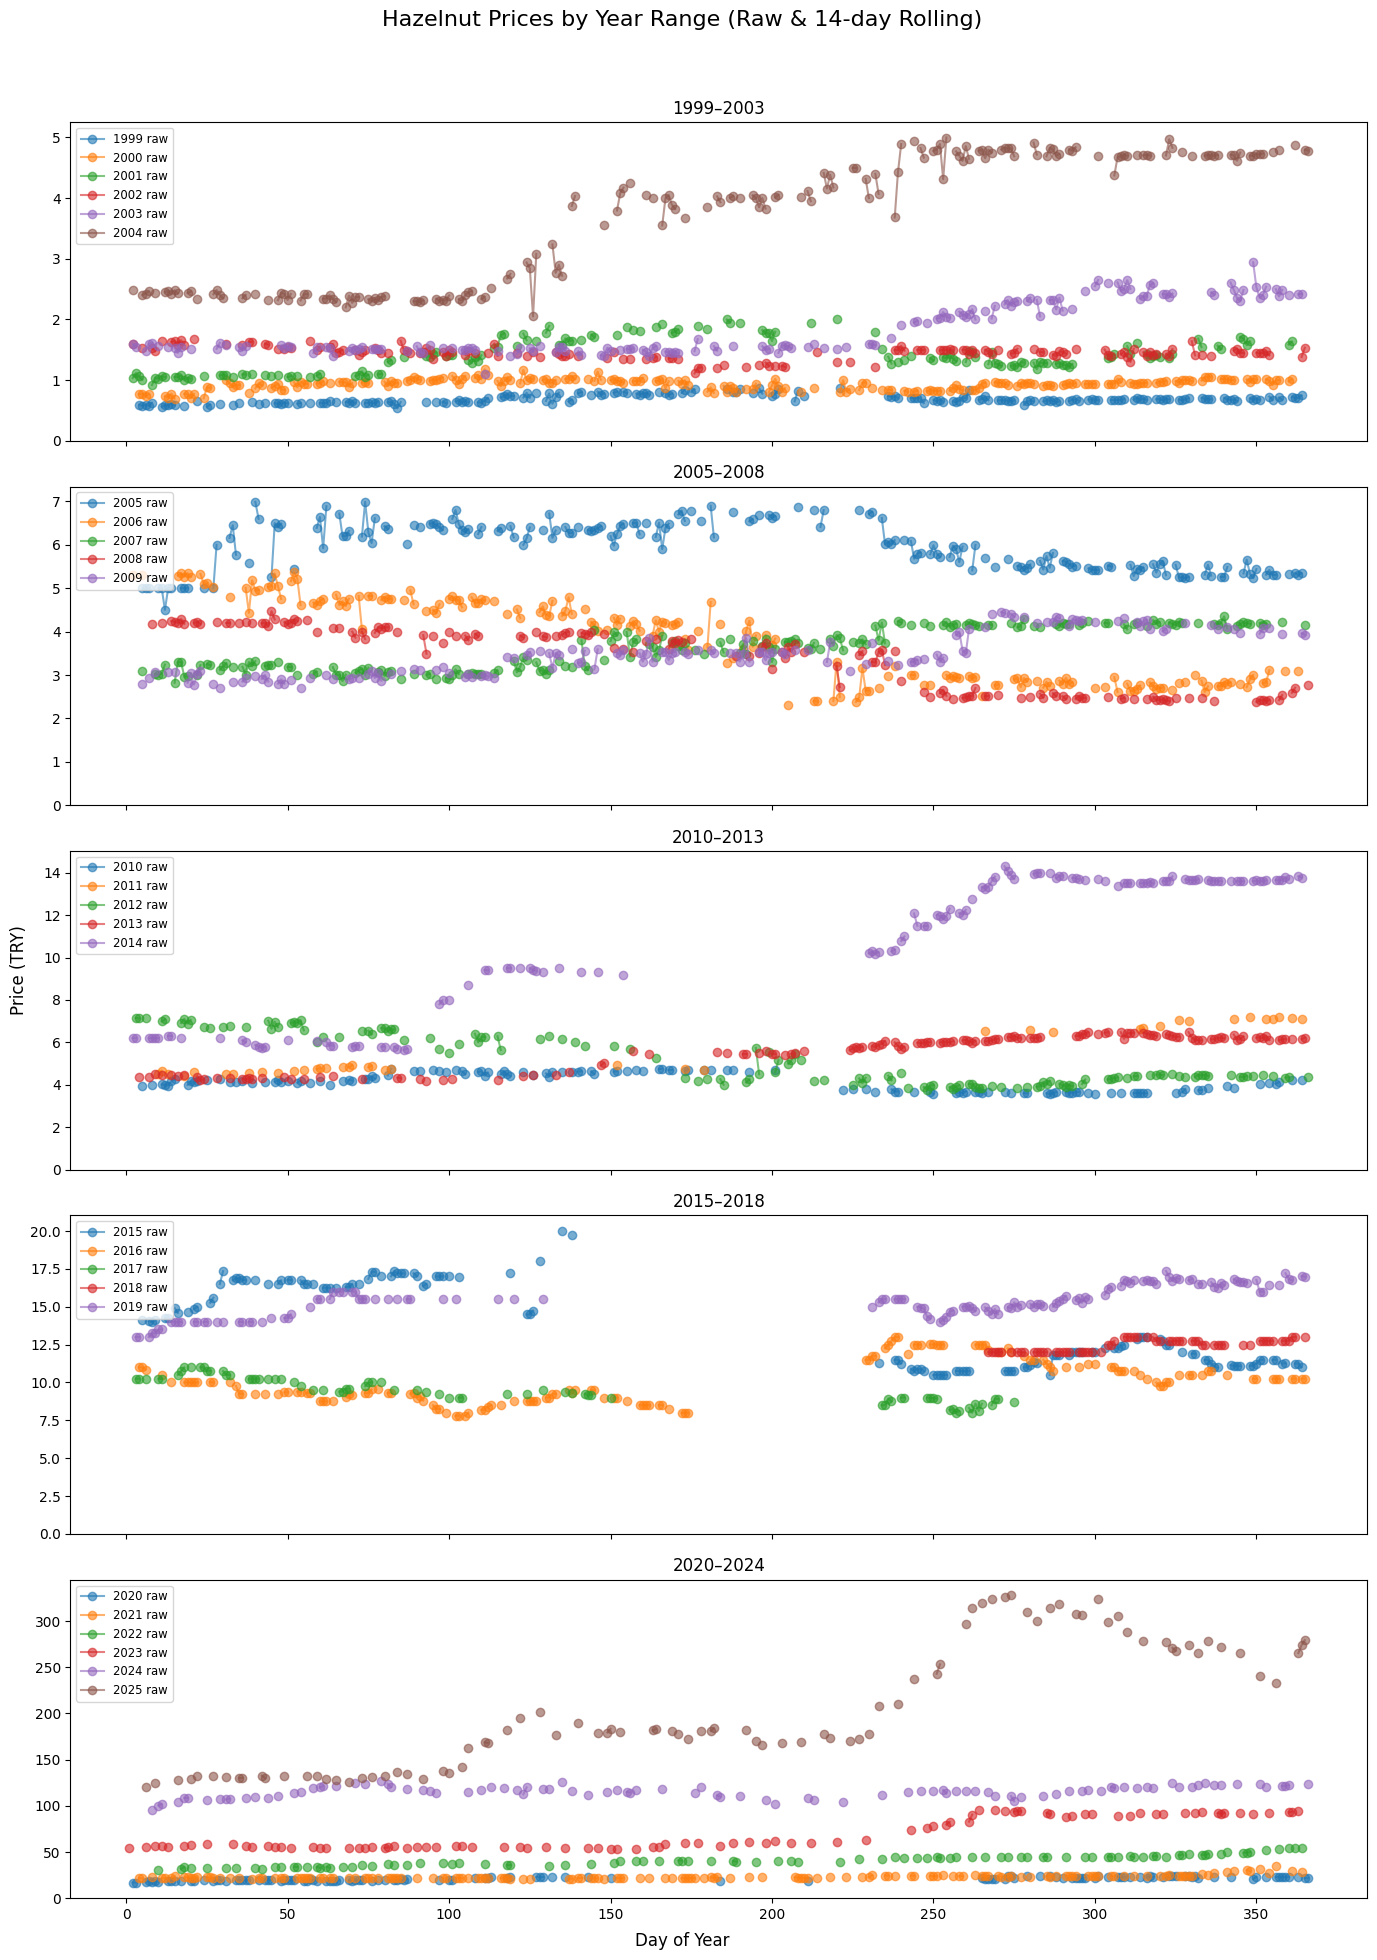

In [ ]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

df["Year"] = df.index.year
df["DayOfYear"] = df.index.dayofyear

year_ranges = [
    range(1999, 2005),
    range(2005, 2010),
    range(2010, 2015),
    range(2015, 2020),
    range(2020, 2026),
]

fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for ax, yr_range in zip(axes, year_ranges):
    max_val = 0  # track max for y-limit
    for year in yr_range:
        group = df[df['Year'] == year]
        if not group.empty:
            ax.plot(group['DayOfYear'], group['Value'], marker='o', linestyle='-', alpha=0.6, label=f'{year} raw')
            max_val = max(max_val, group['Value'].max())
    
    ax.set_ylim(0, max_val * 1.05)
    ax.set_title(f"{min(yr_range)}–{max(yr_range)-1}")
    ax.legend(fontsize='small', loc='upper left')

fig.suptitle("Hazelnut Prices by Year Range (Raw & 14-day Rolling)", fontsize=16)
fig.supxlabel("Day of Year")
fig.supylabel("Price (TRY)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

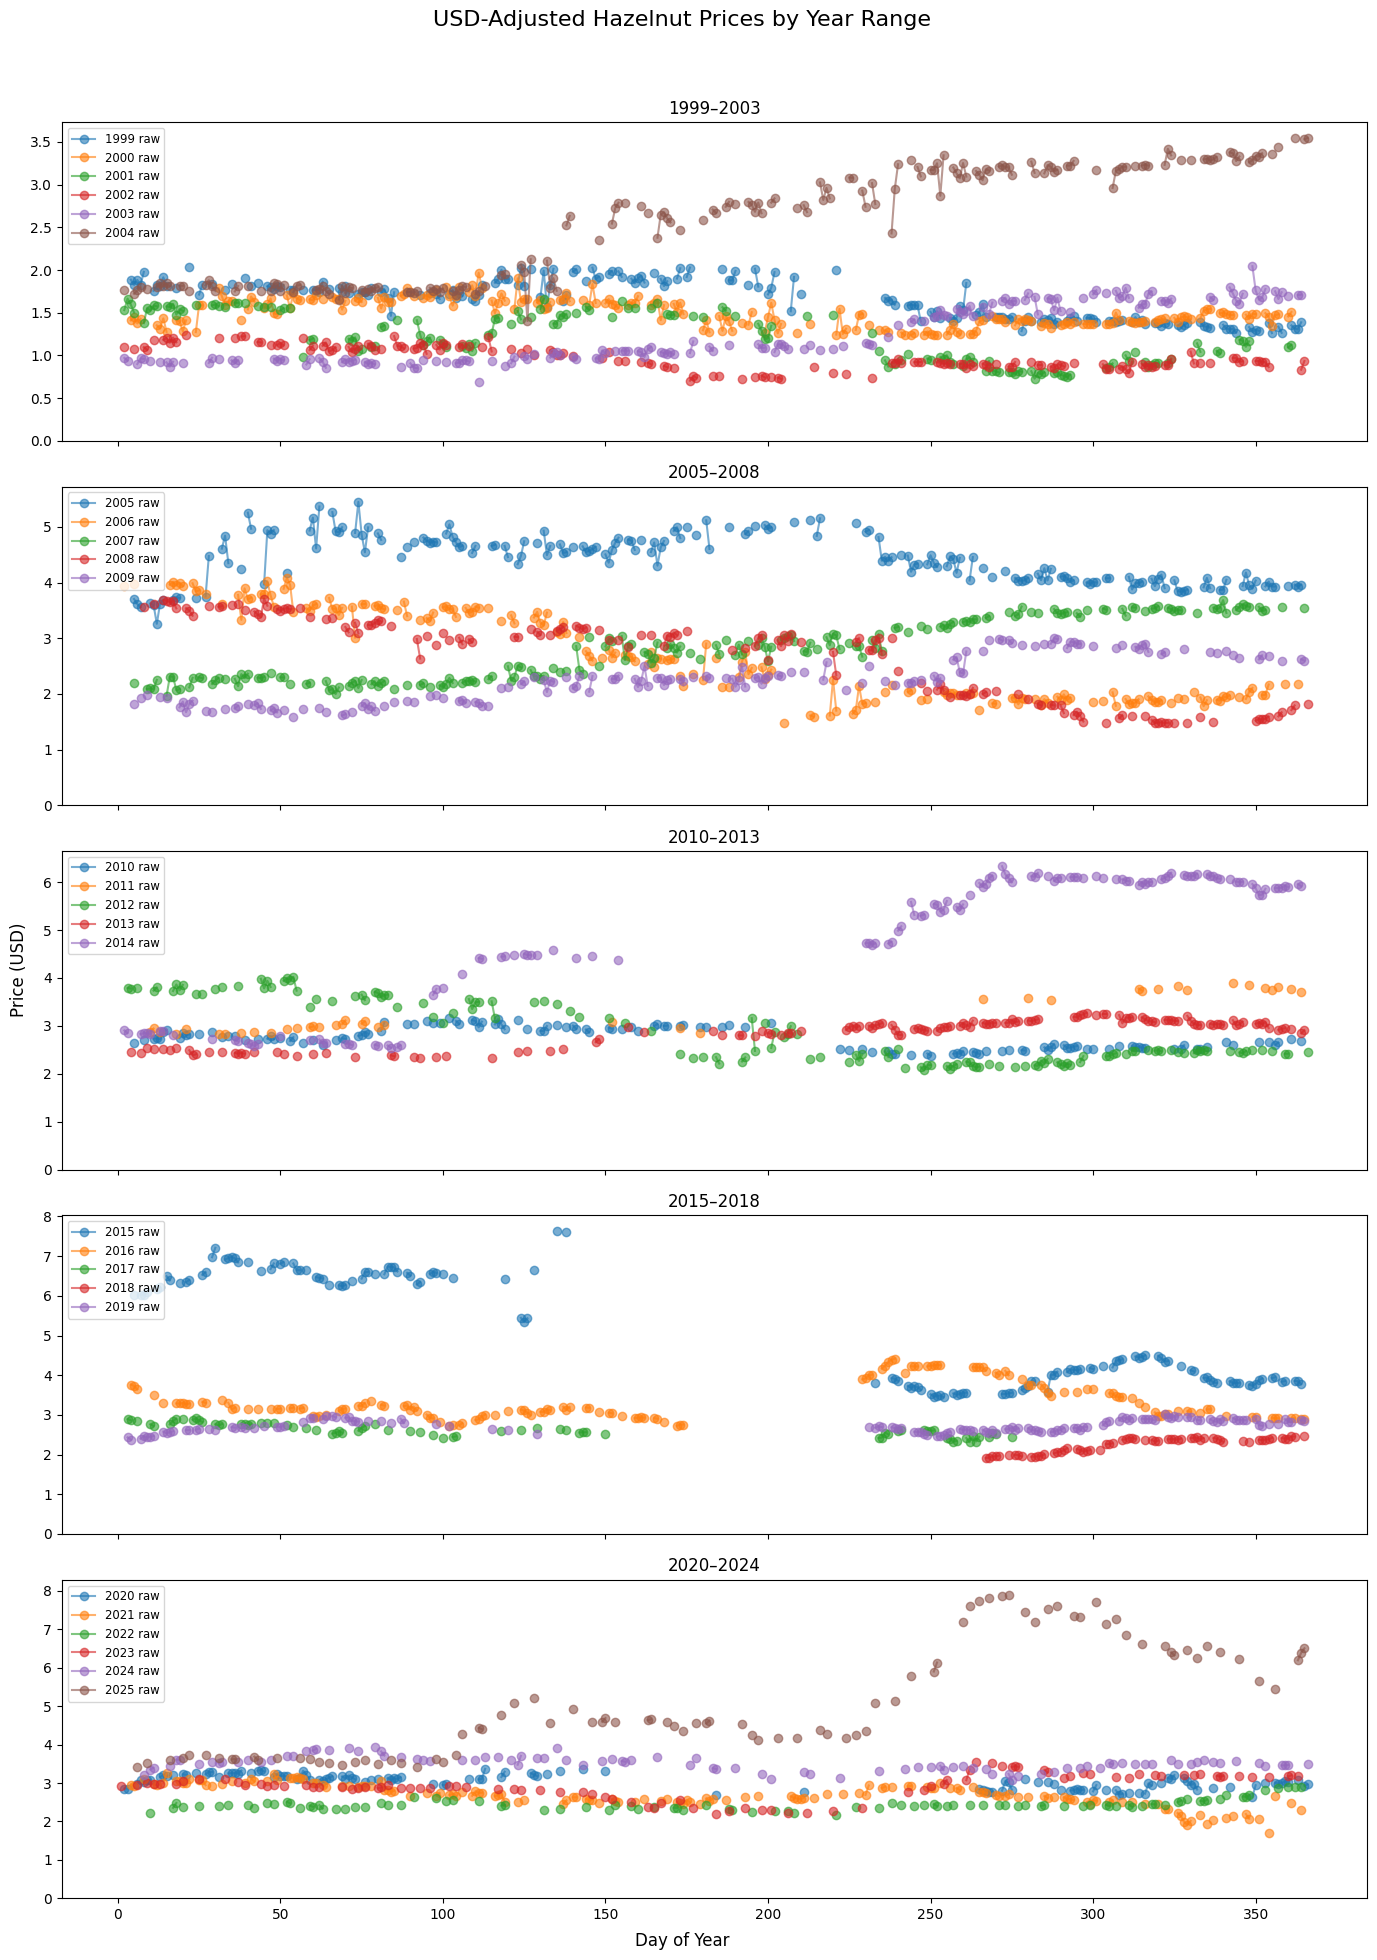

In [ ]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

df["Year"] = df.index.year
df["DayOfYear"] = df.index.dayofyear

year_ranges = [
    range(1999, 2005),
    range(2005, 2010),
    range(2010, 2015),
    range(2015, 2020),
    range(2020, 2026),
]

fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for ax, yr_range in zip(axes, year_ranges):
    max_val = 0  # track max for y-limit
    for year in yr_range:
        group = df[df['Year'] == year]
        if not group.empty:
            ax.plot(group['DayOfYear'], group['AdjustedValue'], marker='o', linestyle='-', alpha=0.6, label=f'{year} raw')
            max_val = max(max_val, group['AdjustedValue'].max())
    
    ax.set_ylim(0, max_val * 1.05)
    ax.set_title(f"{min(yr_range)}–{max(yr_range)-1}")
    ax.legend(fontsize='small', loc='upper left')

fig.suptitle("USD-Adjusted Hazelnut Prices by Year Range", fontsize=16)
fig.supxlabel("Day of Year")
fig.supylabel("Price (USD)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

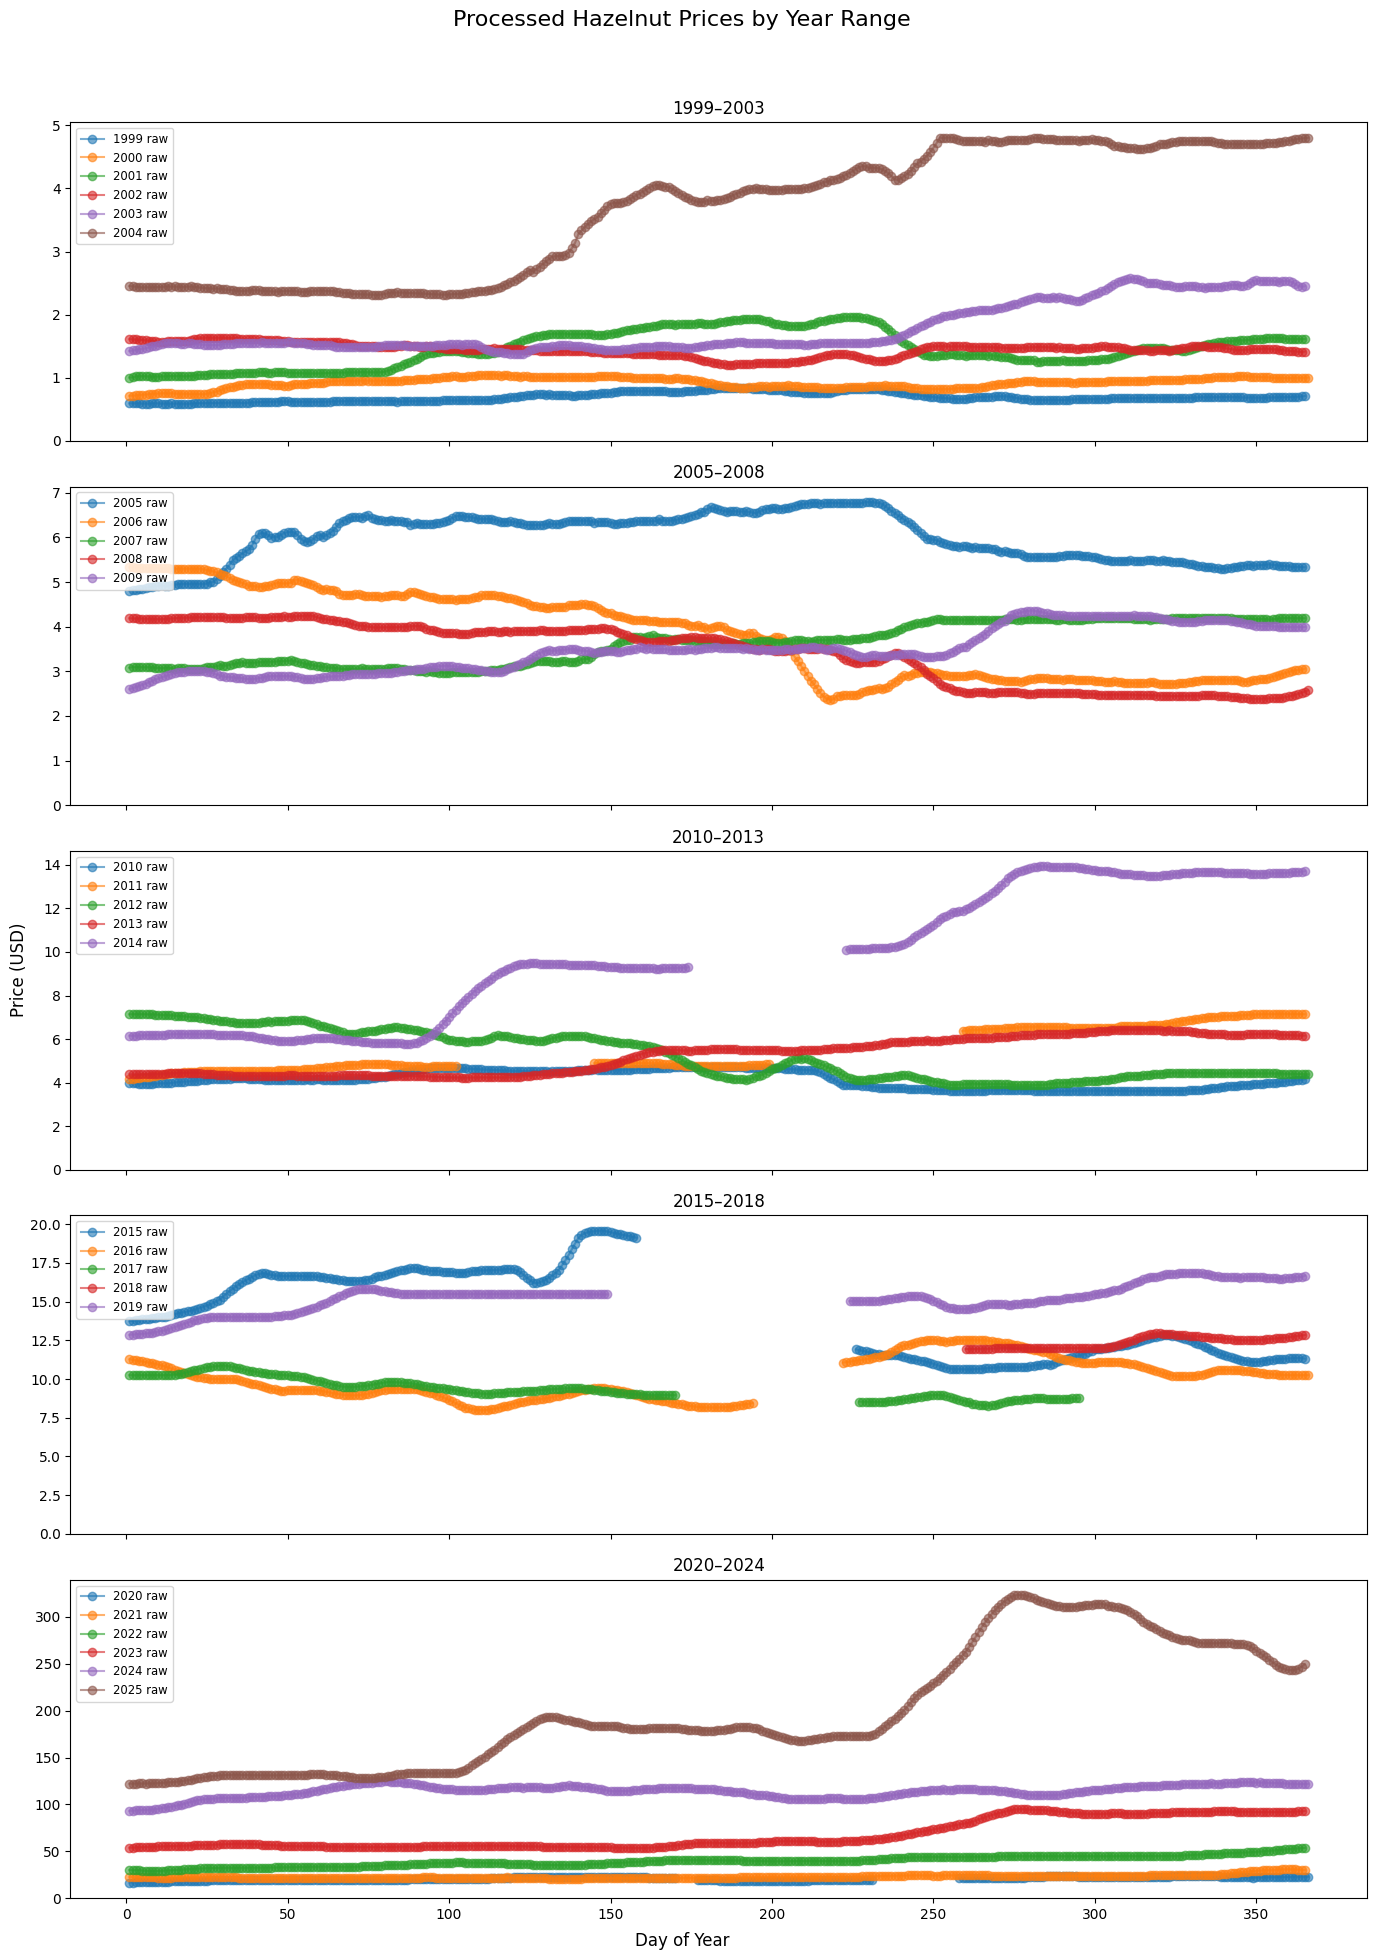

In [ ]:
df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

df["Year"] = df.index.year
df["DayOfYear"] = df.index.dayofyear

year_ranges = [
    range(1999, 2005),
    range(2005, 2010),
    range(2010, 2015),
    range(2015, 2020),
    range(2020, 2026),
]

fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for ax, yr_range in zip(axes, year_ranges):
    max_val = 0  # track max for y-limit
    for year in yr_range:
        group = df[df['Year'] == year]
        if not group.empty:
            ax.plot(group['DayOfYear'], group['rolling_14d'], marker='o', linestyle='-', alpha=0.6, label=f'{year} raw')
            max_val = max(max_val, group['rolling_14d'].max())
    
    ax.set_ylim(0, max_val * 1.05)
    ax.set_title(f"{min(yr_range)}–{max(yr_range)-1}")
    ax.legend(fontsize='small', loc='upper left')

fig.suptitle("Processed Hazelnut Prices by Year Range", fontsize=16)
fig.supxlabel("Day of Year")
fig.supylabel("Price (USD)")
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig(figures_dir / "processed-hazelnut_prices-byyears.png")
plt.show()

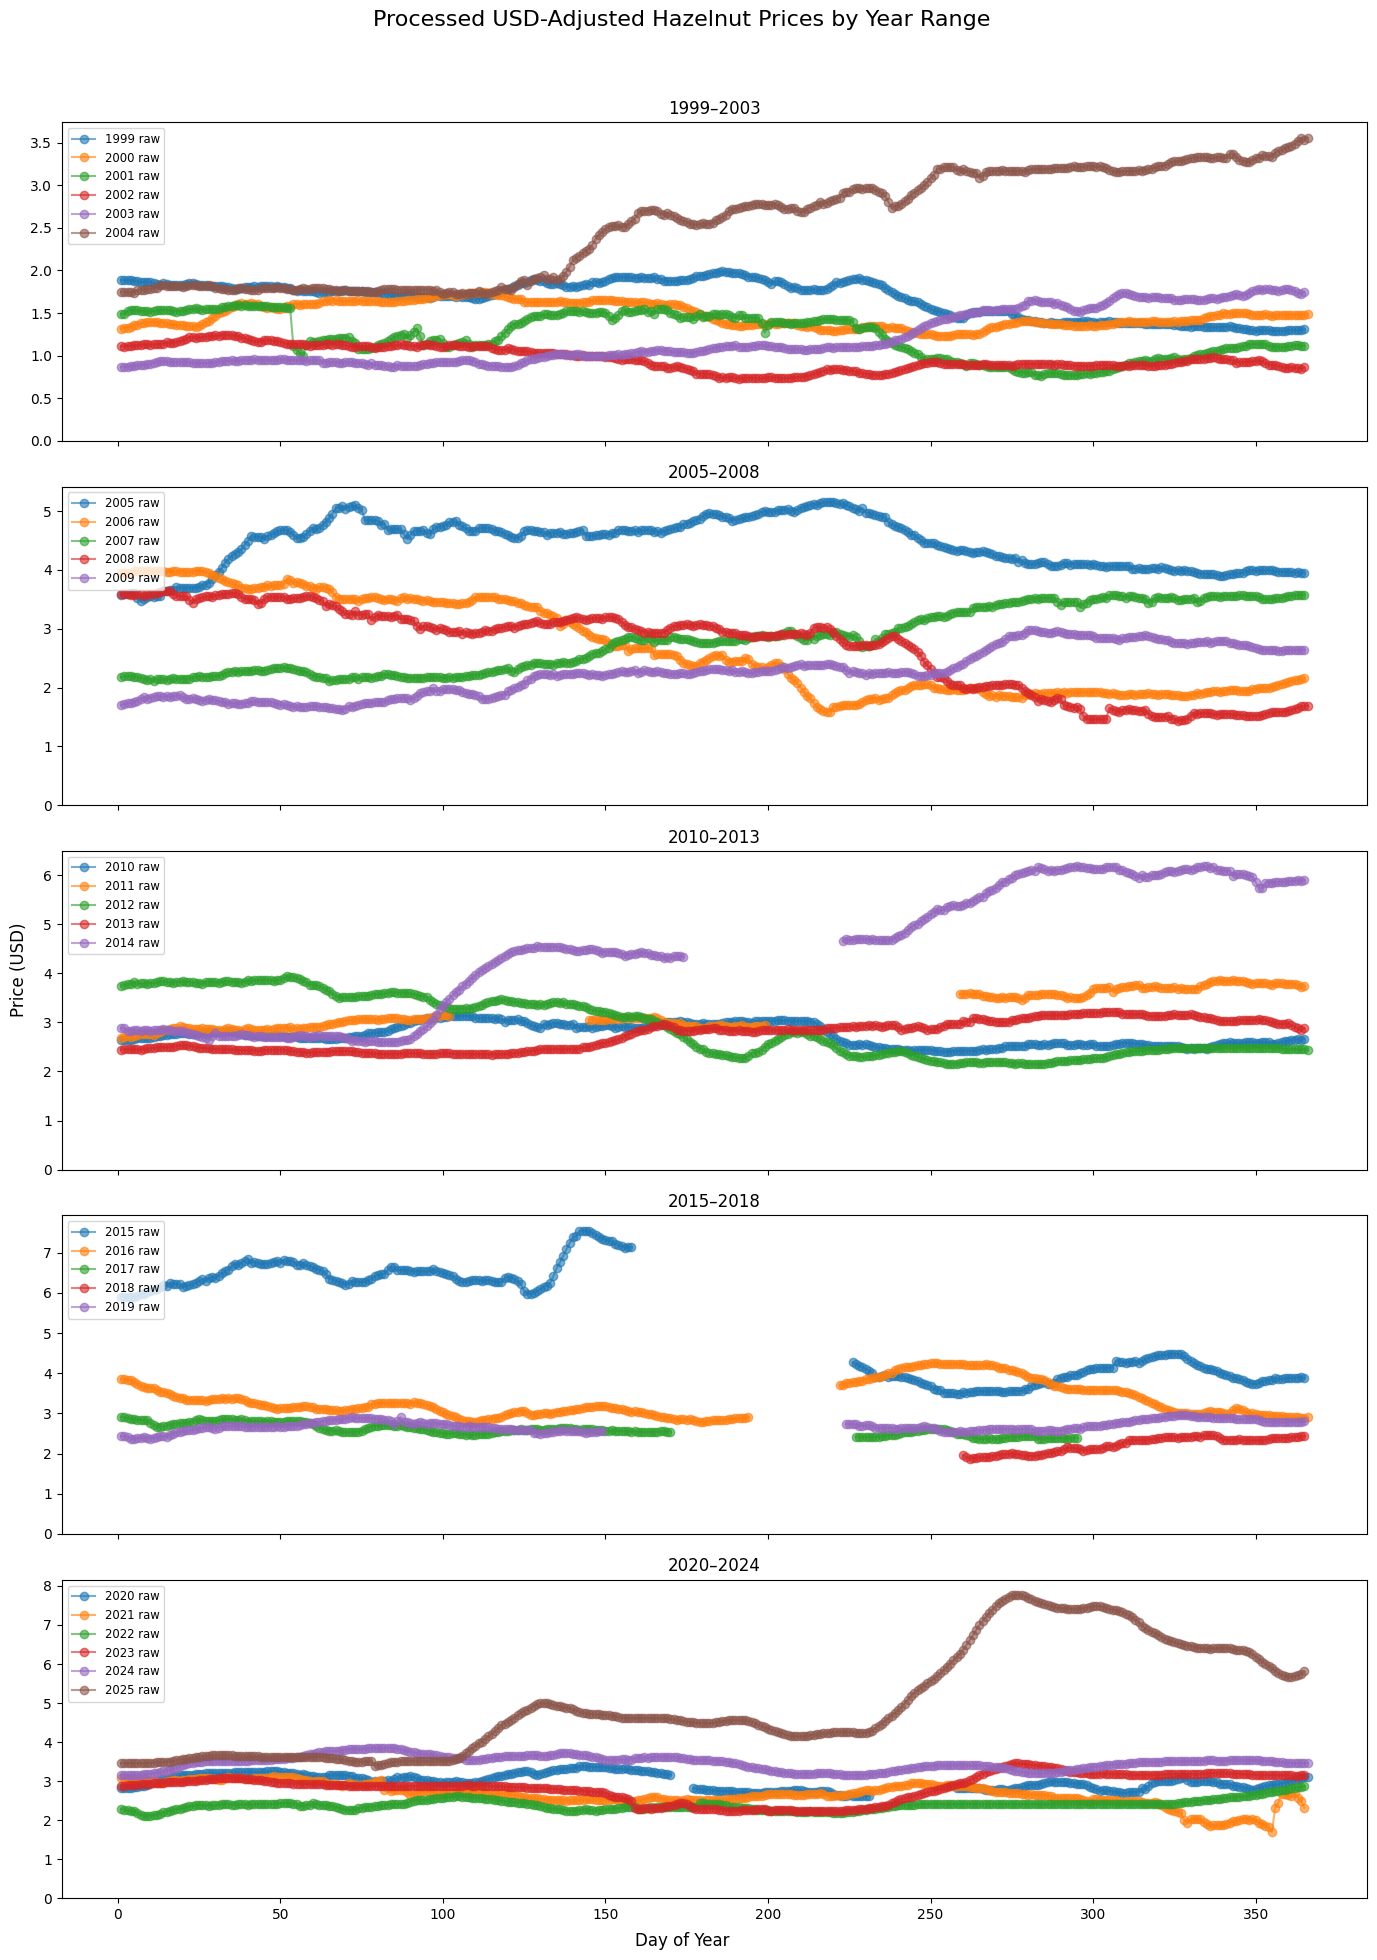

In [ ]:

df = pd.read_csv(hazelnut_file, parse_dates=["Date"])
df = df.set_index("Date").asfreq('D')

df["Year"] = df.index.year
df["DayOfYear"] = df.index.dayofyear

year_ranges = [
    range(1999, 2005),
    range(2005, 2010),
    range(2010, 2015),
    range(2015, 2020),
    range(2020, 2026),
]

fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for ax, yr_range in zip(axes, year_ranges):
    max_val = 0  # track max for y-limit
    for year in yr_range:
        group = df[df['Year'] == year]
        if not group.empty:
            ax.plot(group['DayOfYear'], group['rolling_14d_adjusted'], marker='o', linestyle='-', alpha=0.6, label=f'{year} raw')
            max_val = max(max_val, group['rolling_14d_adjusted'].max())
    
    ax.set_ylim(0, max_val * 1.05)
    ax.set_title(f"{min(yr_range)}–{max(yr_range)-1}")
    ax.legend(fontsize='small', loc='upper left')

fig.suptitle("Processed USD-Adjusted Hazelnut Prices by Year Range", fontsize=16)
fig.supxlabel("Day of Year")
fig.supylabel("Price (USD)")
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig(figures_dir / "processed-adjusted-hazelnut_prices-byyears.png")
plt.show()